# 447 21fa exam 1 due 5p Fri Nov 5

***You are welcome (and encouraged) to:***
- use analytical and numerical computational tools -- specify the tool(s) in sourcecode and/or text;
- reuse example sourcecode and other materials provided in this course;
- consult textbooks, websites, and other publicly-available materials -- include full citation(s) with the URL and/or [DOI](https://en.wikipedia.org/wiki/Digital_object_identifier).

***You are not permitted to discuss the exam problems or share any part of your solutions with anyone other than the Professor or TA for this course.***
- By submitting your exam solution on Canvas, you are affirming your understanding of and adherence to these restrictions.
- We will answer questions during the class Zoom meetings Tue Nov 3 and Thu Nov 5.
- We will also answer questions posted to the Canvas Discussion board until 5p Fri Nov 6.

***The exam deadline is 5p Fri Nov 5 on Canvas.***
- Final submissions received before this deadline will receive +1 bonus points.
- Everyone automatically receives a deadline extension to 11:59p Sun Nov 7. ***No further deadline extensions will be granted -- please plan accordingly.***

In [ ]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
%pdb off

Automatic pdb calling has been turned OFF


In [ ]:
# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# render animation
mpl.rc('animation',html='html5')
# animation
from matplotlib import animation as ani
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym

In [ ]:
# os = operating system; access OS-level commands
# e.g. create directory, delete file, execute command
# (more platform-independent than "!")
import os

In [ ]:
# test whether this is a Colaboratory or Jupyter notebook
try:
  import google.colab
  COLAB = True
  print('Colaboratory Notebook')
except:
  COLAB = False
  print('Jupyter Notebook')

Colaboratory Notebook


In [ ]:
if COLAB:
  # pip = Python package manager; "!" means "run at system level"
  !pip install control
  !pip install JSAnimation
  
  # render SymPy equations nicely in Colaboratory Notebook
  def colab_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
  
  sym.init_printing(use_latex="mathjax",latex_printer=colab_latex_printer)

# Jupyter notebook
else:
  init_printing(use_latex='mathjax')
    

# Python's Control Systems Toolbox
import control as ctrl

# SciPy module that implements many of the routines in ctrl
from scipy import signal as sig

     |████████████████████████████████| 339 kB 4.1 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=aa60a0cfaefae3d512b703a7f99b2cc6af4e5f20ba1e8624bf71a99f6f634053
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11425 sha256=f4db5df2f86e2ad391786a6bd39494b779a054c63d92f547ecb02056e6bbc8c6
  Stored in directory: /root/.cache/pip/wheels/0e/4e/3d/05fb8cca2646ee0bbfbce17c40a970f48d5e0698b9e5aaa91f
Successfully built JSAnimation


In [ ]:
def Jacobian(g,y,d=1e-4):
  """
  approximate derivative via finite-central-differences 

  input:
    g - function - g : R^n -> R^m
    y - n array
    (optional)
    d - scalar - finite differences displacement parameter

  output:
    Dg(y) - m x n - approximation of Jacobian of g at y
  """
  # given $g:\mathbb{R}^n\rightarrow\mathbb{R}^m$:
  # $$D_y g(y)e_j \approx \frac{1}{2\delta}(g(y+\delta e_j) - g(y - \delta e_j)),\ \delta\ll 1$$
  e = np.identity(len(y))
  Dyg = []
  for j in range(len(y)):
      Dyg.append((.5/d)*(g(y+d*e[j]) - g(y-d*e[j])))
  return np.array(Dyg).T

def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

# problem (1.)

The following block diagram defines the frequency-domain transformation $y = \frac{P(A+B)}{1 + P B} r + \frac{P}{1 + P B} d $; let $y_r = \frac{P(A+B)}{1 + P B} r$ denote the reference's contribution to the output and $y_d = \frac{P}{1 + P B} d $ denote the disturbance's contribution to the output.

![block diagram](https://docs.google.com/drawings/d/e/2PACX-1vSrZYQ4nqWsHqgbqBAVMvo3TIwHwhmyB9VR-ve-vz36AkVQRV6v5PAREjXxqDURsiADKVTVprm7p2Y7/pub?w=321&h=138)

## subproblem (1a.)

Use block diagram algebra to determine the transformations $G_{ur}$ and $G_{ud}$ such that $u = G_{ur} r + G_{ud} d$.

**Solution:**

$$u = Ar+B(r-y)$$
$$y=P(u+d)$$
$$u=Ar+Br-By$$
$$u=(A+B)r-By$$
$$u=(A+B)r-BP(u+d)$$
$$u+BPu=(A+B)r-BPd$$
$$u = \frac{A+B}{1+PB}r-\frac{PB}{1+PB}d$$
$$G_{ur}=\frac{A+B}{1+PB}, G_{ud}=-\frac{PB}{1+PB}$$


## subproblem (1b.)

A sinusoidal disturbance can sometimes be perfectly rejected:  give an example of $P$, $B$, and $\omega > 0$ such that $y_d$ is zero when $d(t) = \sin(\omega t)$. 


#Possible Solution 1.#
**Adding a feedforward control on the disturbance path can help reject a sinusoidal disturbance perfectly.**  
 
$$y = ru + Dd$$ 

$$u = Fd$$

$$y = rFd + Dd$$

$$(rF+D)d$$

**I want rF + D = 0**

$$F = \frac{-D}{r}$$
$$$$
where r = input, D = disturbance, y = output, F = feedforward
$$$$
So, 
$$
G_{yr} = \frac{y_r}{r} = \frac{P(A+B)}{1 + P B}
$$
$$$$
$$
G_{yd} = \frac{y_d}{d} = \frac{P}{1+PB}
$$
$$$$
$$
F = -\frac{G_{yd}}{G_{yr}} = \frac{\frac{-P}{1+PB}}{\frac{P(A+B)}{1+PB}}
$$
$$
\boxed{F = -\frac{1}{(A+B)}}
$$
$$$$

**$-\frac{1}{(A+B)}$ should be added on the disturbance path, so $y_{d}=0$.** 

#Possible Solution 2.#
$$ y_d(t)=0 d(t) = sin(wt)$$

$$y_d(t)=\frac{P(s)}{1+P(s)B(s)}=d(t)=0$$

$$\frac{P(s)}{1+P(s)B(s)}sin(wt)=w>0$$

$$P(s)=0$$

$$P(s)=\frac{0}{s^2+s+1}=0$$

$$B(s)=\frac{3s+1}{s^2+2s+1}$$

Since P(s) = 0, B(s) can be any rational fraction.

## subproblem (1c.)

A sinusoidal reference can sometimes be perfectly tracked:  give an example of $P$, $A$, $B$, and $\omega > 0$ such that $y_r = r$ when $r(t) = \sin(\omega t)$.

##Possible Solution 1.##
One way to track a sinusoidal reference is installing a feedback controller that connects u signal and input r. If U(s)*P(s) is equal to Y(s), that means Y(s) should be equal to R(s). As long as P(s) is invertable, we can adjust the output Y(s) perfectly.  

$$
R(s)=Y(s)=U(s)P(s)
$$
$$$$
$$
U(s) = \frac{R(s)}{P(s)} = R(s)P^{-1}(s) 
$$
$$$$
*where $R(s)$ is reference point and $P(s)^{-1}$ is a feedback controller*
$$$$
$$
R(s) = \frac{(A+B)}{1+PB}, P^{-1}(s)^=\frac{1}{P} 
$$
$$$$
$$
U(s) = \boxed{\frac{A+B}{P(1+PB)}}
$$

##Possible Solution 2.##

$$y_r(t)=\frac{P(s)(A(s)+B(s))}{1+P(s)B(s)}r(t)=r(t)$$

$$\frac{P(s)(A(s)+B(s))}{1+P(s)B(s)}sin(wt)=sin(wt) w>0$$

$$P(s)A(s)+P(s)B(s) = 1 + P(s)B(s)$$

$$P(s)A(s) = 1$$

$$P(s) = \frac{1}{A(s)}$$

$$B(s) = \frac{3s+1}{s^2+2s+1}$$

$$P(s) = \frac{s+5}{s^2+6s+9}$$

$$A(s) = \frac{1}{P(s)} = \frac{s^2+6s+9}{s+5}$$


# problem (2.)

Consider the following process model:

$$ P(s) = \frac{b(s)}{a(s)} = \frac{b s^2}{s^4 + a_1 s^3 + a_2 s^2 + a_3 s + a_4} $$

where $b$ and $a_1,a_2,a_3,a_4$ are nonzero parameters.

## subproblem (2a.)

Suppose $a_1 = 1$, $a_2 = 2$, $a_3 = 1$; what range of values for $a_4$ ensure $P$ is stable?

$$$$
##Using Routh-Hurwitz criteria for quartic equation,##
$$$$
$$ \frac{a_1}{a_0},\frac{a_2}{a_0},\frac{a_3}{a_0},\frac{a_4}{a_0} > 0 $$
$$$$
$$\frac{a_1}{a_0}\frac{a_2}{a_0} > \frac {a_3}{a_0}$$
$$$$
$$\frac{a_1}{a_0}\frac{a_2}{a_0}\frac{a_3}{a_0} > \frac{a_1^2}{a_0}\frac{a_4}{a_0}+\frac{a_3^2}{a_0} $$
$$$$
$$\frac{a_4}{a_0} > 0 = \boxed{a_4 > 0} $$
$$$$
$$\frac{1}{1}\frac{2}{1}\frac{1}{1} > \frac{1^2}{1}\frac{a_4}{1}+\frac{1}{1}$$
$$$$
$$2>a_4+1$$
$$$$
$$\boxed{1>a_4}$$
#Thus, $a_4$ must be $\boxed{0<a_4<1}$.#

## subproblem (2b.)

Assume $P$ is stable.  If a ramp input $u(t) = c\, t$ is applied to $P$, what output is produced?  


Assuming b = 2, c = 1, a1 = 1, a2 = 2, a3 = 1, a4 = 0.8,



[Please click this link for the answer (google doc)](https://docs.google.com/document/d/e/2PACX-1vQrC_w9JUXSDSaCme-oR7QCo5XnGD5HpjrNToPGAqiIv25NCNM0y8n0VDeNhMN_pyHmbiG1g3QddgBi/pub)

*Please ignore the name of the graph.*

In order to find a stability of this discrete time system with a ramp input $u(t)=ct$ we have to take a inverse laplace transform of the given transfer function, $P(s)$. the inverse laplace transform of the given transfer function would be in $e^{t}$ terms.
depending on the constant c, the amplitude(y) decreases, but the values oscillate over time and eventually converge to 0. 

# problem (3.)

When we run a numerical simulation of a continuous-time linear time-invariant system 
$$\dot{x} = Ax,$$
using the `numerical_simulation` function from lecture, 
we are defining a discrete-time linear time-invariant system
$$ \bar{x}^+ = \bar{A}\bar{x} = \bar{x} + \Delta A \bar{x} $$
where $\Delta > 0$ is the *timestep* parameter.

In this problem, you will study stability properties of the continuous-time system $\dot{x} = A x$ and corresponding discrete-time (numerical simulation) system $\bar{x}^+ = \bar{A}\bar{x}$.

# subproblem (3a.)

Is the system $\dot{x} = A x$ stable when $A = \left[\begin{array}{cc} -1/100 & 1 \\ -1 & -1/100 \end{array}\right]$?  Justify your answer -- be clear about what stability test you used.

$$det\left[\begin{array}{cc} \lambda I-A \end{array}\right] = 0$$

$$det\left[\begin{array}{cc} \lambda -1/100 & -1 \\ 1 & \lambda -1/100 \end{array}\right] = 0$$

$$\lambda^{2}+\frac{1}{50}\lambda+1.0001=0$$

$$\frac{-b±\sqrt{b^2-4ac}}{2a} = \frac{-\frac{1}{50}±\sqrt{(-\frac{1}{50})^2-4(1)(1.0001)}}{2(1)}$$

$$\lambda = -0.01±\frac{\sqrt{-4}}{2}$$

$$\lambda = -0.01±1j$$

**Solution**

This system is stable(asymtotically). In order for a system to be stable, eigenvalues must be a negative value(in the second and third quadrant.) This $\lambda$ is negative 0.01(real number, x) and $1i$(imaginary number, y). One is on $(-0.01, 1i)$, and the other one is on $(-0.01, -1i)$ As you can see with the trajectory I plotted below, it will eventually converge to the equilibrium.




Plot the trajectory of the continuous-time system $\dot{x} = A x$ initialized at $x(0) = (1,0)$ determined using the matrix exponential (you can use the numerical routine `scipy.linalg.expm`).  Use the time interval $[0,10\pi]$.

**Please scroll down for this solution.**


# subproblem (3b.)

Plot the trajectory of the discrete-time system $\bar{x}^+ = \bar{A}\bar{x} = \bar{x} + \Delta A \bar{x}$ initialized at $\bar{x}(0) = (1,0)$ with timestep $\Delta = 1/2$.   Use the time interval $[0,10\pi]$.

Is the system $\bar{x}^+ = \bar{A}\bar{x} = \bar{x} + \Delta A$ stable when and $\Delta = 1/2$?  You do not need to justify your answer.

**Answer:**
The system is stable.

$x_{k+1}=F(x_k)$

$x_{k}=x(k\Delta t)$

$a = (k+1)Δt, b = kΔt$

$x_{k+1}=x_k+\int_a^b f(τ) \;dτ$ (Flow map)

If $\Delta = 1/2,$ This integral term steps the calculation forward $\Delta = \frac{1}{2}$ times.

A lot of discrete time systems are hard to be explained into the integral term. Instead, we can use $x_{k+1}=x_k+\Delta + f(x_k)$

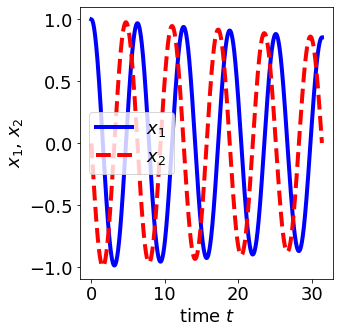

In [ ]:
#Solution for Subproblem (3a.)

A = np.array([[-1/100,1], 
     [-1,-1/100]])
C = la.eigvals(A)
## matrix exponential##
def f(t,x,u):
    x1,x2 = x # charge, current
    return np.dot(x,A.T)
##Another way to plot the mtarix using the matrix exponential##
#def exp(A, x):
#    Ax = A*x
#    if max(np.absolute(Ax))>1e-4:
#        sqrt = exp(A, x/2)
#        return sqrt @ sqrt
#    sq = Ax @ Ax
#    return 1 + Ax + sq / 2 + sq @ Ax / 6

plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
x10,x20 = (1.,0.)
x0 = np.array([x10,x20])

# simulation time
t = 10*np.pi
t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'r--',lw=4,label='$x_2$')
plt.legend()

# phase portrait / "quiver" plot



In [ ]:
A = np.array([[-1/100,   1],
              [-1, -1/100]])
print("A:", A)
print('eigenvalues of A =',la.eigvals(A))
Re_eigvals = np.real(la.eigvals(A))

if np.any(Re_eigvals > 0):
  print('A is *unstable*')
  
elif np.all(Re_eigvals < 0):
  print('A is *asymptotically stable*')
  
else:
  print('A is *neutrally stable*')

A: [[-0.01  1.  ]
 [-1.   -0.01]]
eigenvalues of A = [-0.01+1.j -0.01-1.j]
A is *asymptotically stable*


In [ ]:
# Solution for subproblem (3b.)
#Decrete time input (exponential)
def exponential(a, n):
    expo =[]
    for sample in n:
        expo.append(np.exp(a * sample))
    return (expo)
         
a = 2
UL = 1
LL = -1
n = np.arange(LL, UL, 0.1)
x = exponential(a, n)
plt.stem(n, x)
plt.xlabel('n')
plt.xticks(np.arange(LL, UL, 0.2))
# plt.yticks([0, UL, 1])
plt.ylabel('x[n]')
plt.title('Exponential Signal e**(an)')
plt.savefig("Exponential.png")
# input
u = lambda s: 0
t = np.pi
dt = 1e-2
y1_0 = x+A*x
y3_0 = 3
T = np.arange(0,t,dt)

def simulate_y(y0, u, T, dt, a, b):
 y = [y0] # output
 for s in T[:-1]: # loop through times; exlude final time
    y.append(Ax + dt * (-a*y[-1] + b*u(s))) # DE
 return y
y1 = simulate_y(y1_0, u, dt)
y3 = simulate_y(y3_0, u, T, dt, a, b)
# Alternative method (less efficient)-- not writing a function but using the code directly instead
# y1 = [y1_0] # output for y1
# for s in T[:-1]: # loop through times; exlude final time
# y1.append(y1[-1] + dt * (-a*y1[-1] + b*u(s))) # DE
 
# y3 = [y3_0] # output for y3
# for s in T[:-1]: # loop through times; exlude final time
# y3.append(y3[-1] + dt * (-a*y3[-1] + b*u(s))) # DE..
y1 = np.array(y1) # convert Python list y1 to NumPy array
y3 = np.array(y3) # convert Python list y1 to NumPy array
# code snippet for plotting in problem (a.)
plt.plot(T, 3*y1, 'r', label=r'$3y_1$') # label this line for inclusion in a legend
plt.plot(T, y3, label=r'$y_3$', linestyle='--', linewidth=2) 
plt.xlabel(r'time ($t$)')
plt.ylabel(r'output ($y$)')
plt.legend() # adds legend using label's specified in plot(...) commands

pass

NameError: ignored

In [ ]:
# Solution for subproblem (3b.)

#descrete time input unit step 
def unit_step(a, n):
    unit =[]
    for sample in n:
        if sample<a:
            unit.append(0)
        else:
            unit.append(1/2)
    return(unit)
# input
u = lambda s: 0
t = np.pi
dt = 1e-2
y1_0 = x+A*x
y3_0 = 3
T = np.arange(0,t,dt)

def simulate_y(y0, u, T, dt, a, b):
 y = [y0] # output
 for s in T[:-1]: # loop through times; exlude final time
    y.append(Ax + dt * (-a*y[-1] + b*u(s))) # DE
 return y
y1 = simulate_y(y1_0, u, dt)
y3 = simulate_y(y3_0, u, T, dt, a, b)
# Alternative method (less efficient)-- not writing a function but using the code directly instead
# y1 = [y1_0] # output for y1
# for s in T[:-1]: # loop through times; exlude final time
# y1.append(y1[-1] + dt * (-a*y1[-1] + b*u(s))) # DE
 
# y3 = [y3_0] # output for y3
# for s in T[:-1]: # loop through times; exlude final time
# y3.append(y3[-1] + dt * (-a*y3[-1] + b*u(s))) # DE..
y1 = np.array(y1) # convert Python list y1 to NumPy array
y3 = np.array(y3) # convert Python list y1 to NumPy array
# code snippet for plotting in problem (a.)
plt.plot(T, 3*y1, 'r', label=r'$3y_1$') # label this line for inclusion in a legend
plt.plot(T, y3, label=r'$y_3$', linestyle='--', linewidth=2) 
plt.xlabel(r'time ($t$)')
plt.ylabel(r'output ($y$)')
plt.legend() # adds legend using label's specified in plot(...) commands

pass

ValueError: ignored

# problem (4.)

Consider the following nonlinear system (NL):
$$
\dot{x_1} = - \lambda x_2 + x_1 x_2,\quad \dot{x_2} = \lambda x_1 + \frac{1}{2}(x_1^2 - x_2^2).
$$

## subproblem (4a.)

Linearize the nonlinear system about the equilibrium $x_e = (-2\lambda,0) \in\mathbb{R}^2$ to determine matrix $A$ such that $\dot{x} \simeq A (x-x_e)$ for $x$ near $x_e$.
$$
\dot{x_1} = - \lambda x_2 + x_1 x_2,\quad \dot{x_2} = \lambda x_1 + \frac{1}{2}(x_1^2 - x_2^2).
$$
**Solution:**\
In state-space form, the nonlinear system is
$$\dot{x} = \frac{d}{dt} \left[\begin{matrix} x_1 \\ x_2 \end{matrix}\right] = \left[\begin{matrix} -\lambda x_2+x_1x_2 \\ \lambda x_1+\frac{1}{2}x_1^2-\frac{1}{2}x_2^2 \end{matrix}\right] = f(x-x_e).$$

The Jacobian derivative of $f$ with respect to $x$ is
$$ \partial_x f = \left[\begin{matrix} \partial_{x_1} \dot{x}_1 &  \partial_{x_2} \dot{x}_1 \\  \partial_{x_1} \dot{x}_2 &  \partial_{x_2} \dot{x}_2 \end{matrix}\right] = \left[\begin{matrix} x_2 & -\lambda +x_{1} \\  \lambda + x_{1} & -x_{2} \end{matrix}\right].$$

Evaluating the Jacobian at $x_e = (-2\lambda ,0)$ yields
$$\partial_x f(x_e) = \boxed{\left[\begin{matrix} 0 & -3\lambda \\ -1\lambda & 0 \end{matrix}\right] = A}$$

$$\lambda = 3, 1$$




## subproblem (4b.)

Consider the function 
$$ H(x_1,x_2) = -\frac{\lambda}{2}\left(x_1^2 + x_2^2\right) + \frac{1}{2}\left(x_1 x_2^2 - \frac{1}{3}x_1^3\right). $$

Show that $H$ is constant along trajectories of (NL) by computing $\dot{H}$

**Solution:**

I use gradient to compute $\dot{H}$.

Simplifing the given equation $H(x_1,x_2)$, I get,

$$H(x_1,x_2)=-\frac{\lambda}{2}x^2_1-\frac{\lambda}{2}x^2_2+\frac{1}{2}x_1x_2^2-\frac{1}{6}x^3_1$$

$$\frac{\partial_{H}}{\partial_{x_1}}= -\lambda x_1-0+\frac{1}{2}x^2_2-\frac{1}{2}x^2_1=\boxed{\frac{1}{2}x^2_2-\frac{1}{2}x^2_1-\lambda x_1}$$

$$\frac{\partial_{H}}{\partial_{x_2}}= 0-\lambda x_2+x_1x_2-0 = \boxed{x_2(x_1 - \lambda)}$$

$$\boxed{∇H(x_1,x_2)=\left[\begin{matrix} \frac{1}{2}x^2_2-\frac{1}{2}x^2_1-\lambda x_1 \\  x_2(x_1 - \lambda) \end{matrix}\right]}$$


**Please check out the phase portrait below.**

## subproblem (4c.)

Create a phase portrait of the nonlinear system (NL) on the square $x_1,x_2\in(-2.5,+2.5)$ with $\lambda = 1$:  use ``plt.quiver`` or ``plt.streamplot`` as in the examples presented in lecture / provided on homework solutions.

How many equilibria do you see in this phase portrait?

For 4a.
Trajectories move away from the center of the phase portrait. So, there is one unstable point in the center. 

For 4b.
Trajectories are moving towards (-2,0), (-1,-1.3), (0,0), and (1,1.3). 

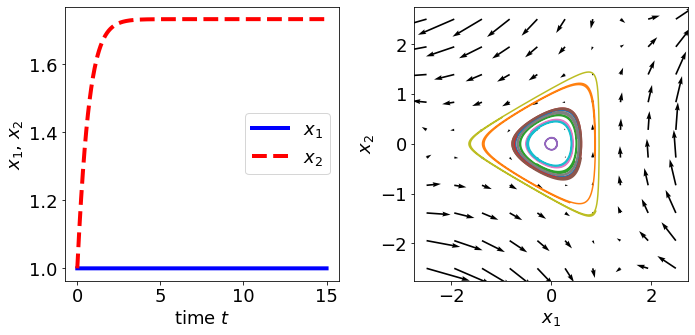

In [ ]:
# solution for subproblem. (4c.)


def f(t,x,u):
    x1,x2 = x
    lambda11 = 1. 
    dx1 = (-lambda11*x2) + (x1 *x2)
    dx2 = (lambda11*x1) + (1/2)*(x1**2 - x2**2)
    return np.array([dx1, dx2])

plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
x10,x20 = (1.,1.)
x0 = np.array([x10,x20])

# simulation time−−
t = 15

t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'r--',lw=4,label='$x_2$')
plt.legend()

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
Q, Qd = np.meshgrid(np.linspace(-2.5,+2.5, 10), np.linspace(-2.5, +2.5, 10))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
#ax.plot(q_,dq_,'b',lw=4)

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
  q_,dq_ = x_[:,0],x_[:,1]
  ax.plot(q_,dq_)
  

plt.tight_layout()

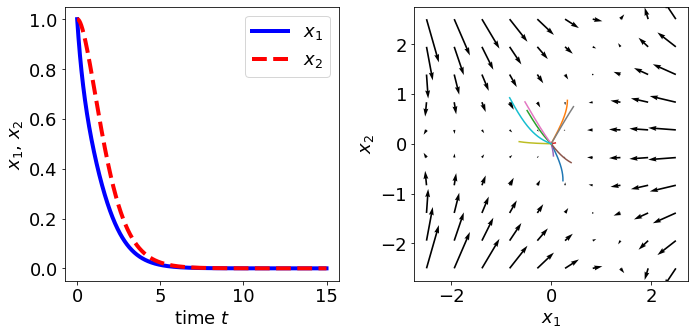

In [ ]:
# For subproblem (4b.)
def f(t,x,u):
    x1,x2 = x
    lambda1 = 1. 
    dx1 = ((1/2)*x2**2)-((1/2)*x1**2)-(lambda1*x1)
    dx2 = x2*(x1-lambda1)
    return np.array([dx1, dx2])

plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
x10,x20 = (1.,1.)
x0 = np.array([x10,x20])

# simulation time−−
t = 15

t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'r--',lw=4,label='$x_2$')
plt.legend()

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
Q, Qd = np.meshgrid(np.linspace(-2.5,+2.5, 10), np.linspace(-2.5, +2.5, 10))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
#ax.plot(q_,dq_,'b',lw=4)

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
  q_,dq_ = x_[:,0],x_[:,1]
  ax.plot(q_,dq_)
  

plt.tight_layout()